# KMeansの実行例

## 【準備】一般的なライブラリのインポート

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

## 【準備】ダミーデータの作成

実行サンプルなので、ダミーデータを作成して入力データとする。  
ここでは、500個の2次元のサンプル点を10個のクラスタに分けた形で用意する。  
また、10個のクラスタ内の点はランダムな中心点から標準偏差1で点を取っている。  

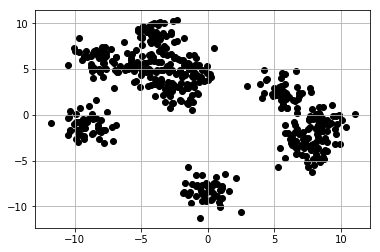

In [4]:
from sklearn.datasets import make_blobs  # ダミーデータの生成用

# Xには1つのプロットの(x,y)が、yにはそのプロットの所属するクラスター番号が入る
X,y=make_blobs(n_samples=500,         # サンプル点の総数
               n_features=2,          # 特徴量（次元数）の指定  default:2 
               centers=10,             # クラスタの個数
               cluster_std=1,       # クラスタ内の標準偏差 
               shuffle=True,          # サンプルをシャッフル
               random_state=46)        # 乱数生成器の状態を指定

plt.scatter(X[:,0],X[:,1],c='black',marker='o')
plt.grid()
plt.show()

## 【学習】KMeansを使った学習モデルの学習を行う

KMeansでは、最初に分類するクラスタの数を設定する必要がある。
ここでは、クラスタの数を4とする。

sklearnの機械学習モデルの学習にはfit()メソッドを使用する。  
手順：
1. モデルインスタンスのコンストラクト : KMeans()
2. モデルパラメータの学習             : fit()

In [5]:
from sklearn.cluster import KMeans

# モデルインスタンスをコンストラクト
model = KMeans(n_clusters=4,            # クラスターの個数
            init='random',           # セントロイドの初期値をランダムに設定  default: 'k-means++'
            random_state=48)          # セントロイドの初期化に用いる乱数発生器の状態

# モデルパラメータを入力データにフィッティングさせる
# (モデルパラメータの学習)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=48, tol=0.0001, verbose=0)

## 【予測】学習学習後のモデルで予測を行う

sklearnの機械学習モデルを使った予測ではpredict()メソッドを使用する。  
学習後のパラメータはモデルインスタンスが保持しているので、学習・予測を一連のフローで行う場合には、  
パラメータを意識しなくてもよい。  

ここでは、尤もらしい結果を返すモデルパラメータが学習できている事を確認するために、学習に用いたデータを予測する。

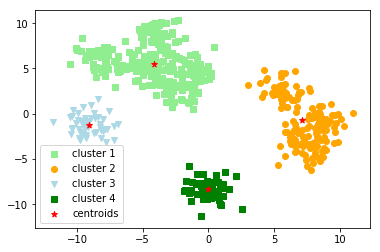

In [6]:
# 予測を行う
y_km = model.predict(X)

# データを平面にプロットする
plt.scatter(X[y_km==0,0], X[y_km==0,1], c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], c='orange', marker='o', label='cluster 2')
plt.scatter(X[y_km==2,0], X[y_km==2,1], c='lightblue', marker='v', label='cluster 3')
plt.scatter(X[y_km==3,0], X[y_km==3,1], c='green', marker='s', label='cluster 4')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='*', c='red', label='centroids')
plt.legend()
plt.show()

## アルゴリズムの動作の可視化

イテレーション回数：1回


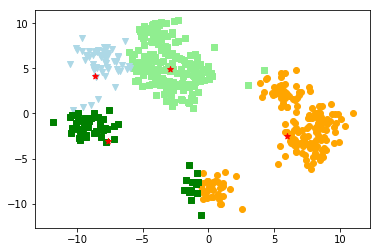

イテレーション回数：2回


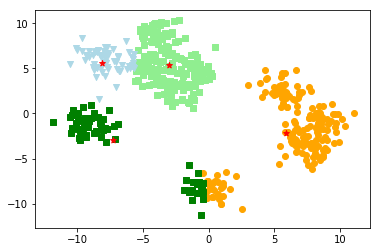

イテレーション回数：3回


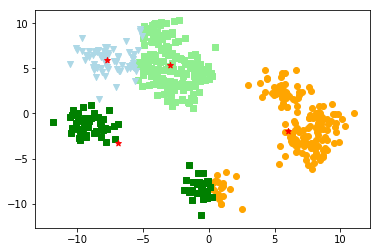

イテレーション回数：4回


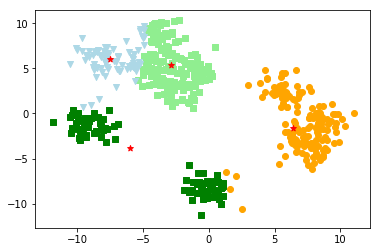

イテレーション回数：5回


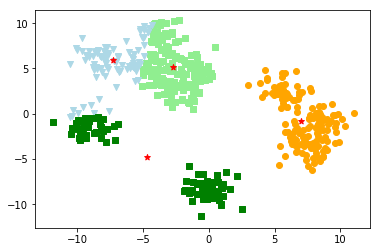

イテレーション回数：6回


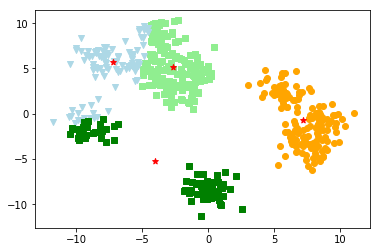

イテレーション回数：7回


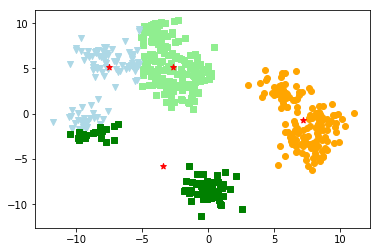

イテレーション回数：8回


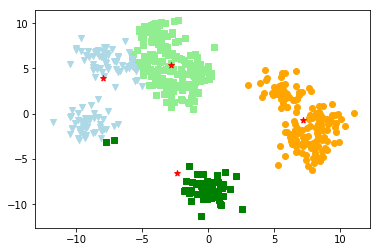

イテレーション回数：9回


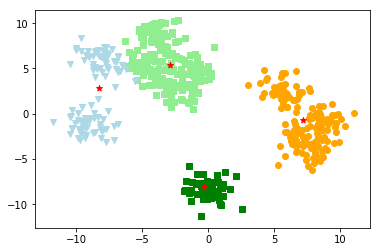

イテレーション回数：10回


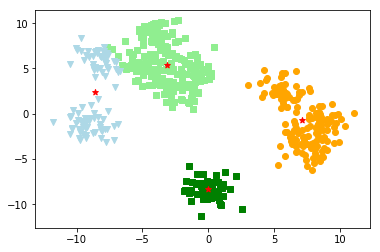

イテレーション回数：11回


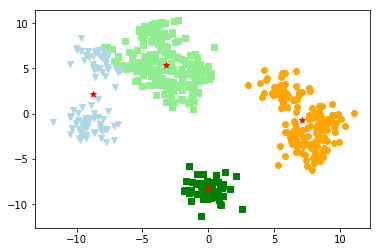

イテレーション回数：12回


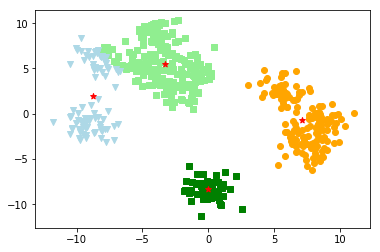

イテレーション回数：13回


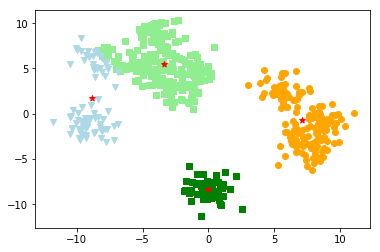

イテレーション回数：14回


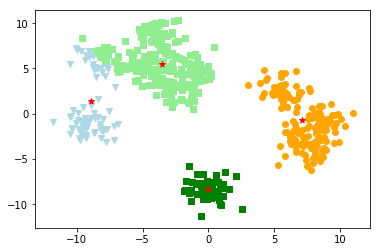

イテレーション回数：15回


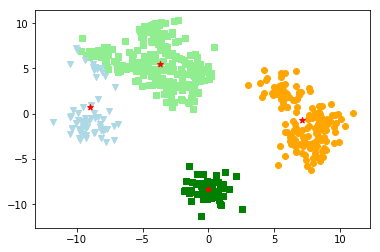

イテレーション回数：16回


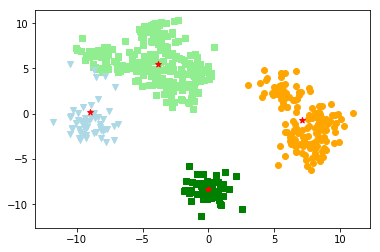

イテレーション回数：17回


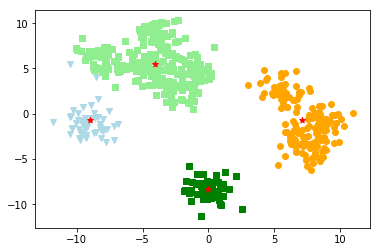

イテレーション回数：18回


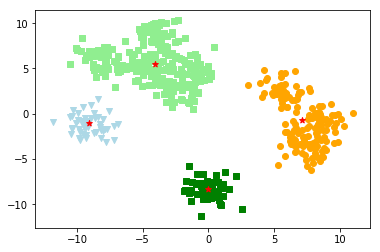

イテレーション回数：19回


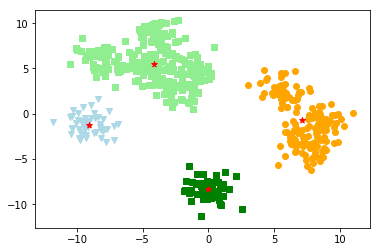

イテレーション回数：20回


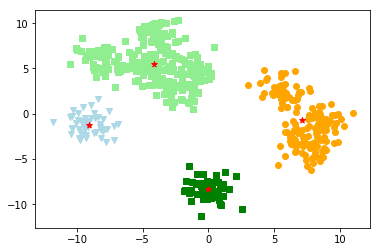

イテレーション回数：21回


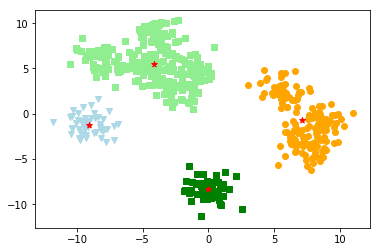

イテレーション回数：22回


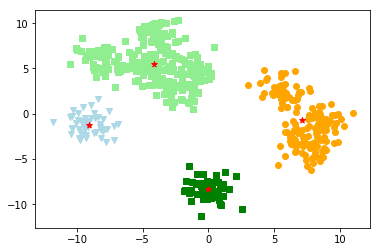

イテレーション回数：23回


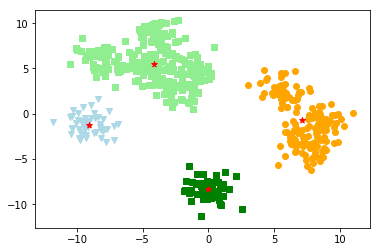

イテレーション回数：24回


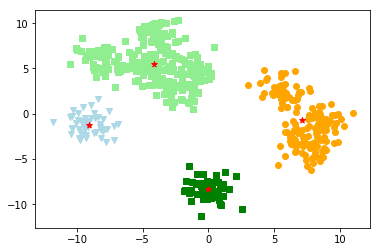

イテレーション回数：25回


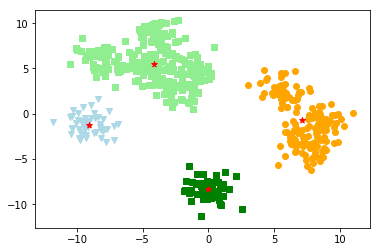

イテレーション回数：26回


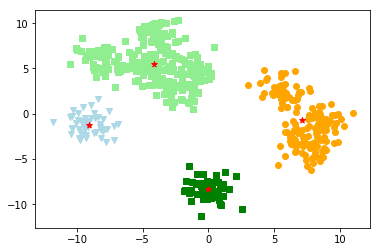

イテレーション回数：27回


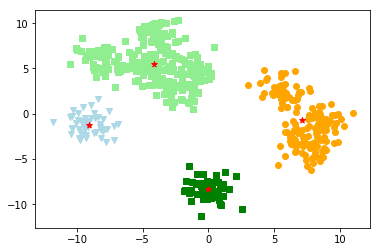

イテレーション回数：28回


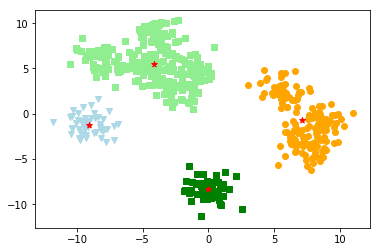

イテレーション回数：29回


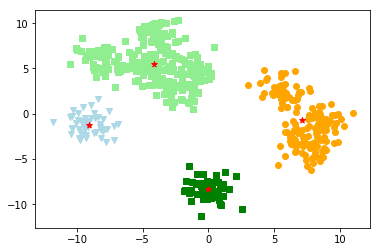

In [12]:
import matplotlib.animation as animation

imgs = []
fig = plt.figure()
for loop in range(1, 30):
    fig.clear()
    print('イテレーション回数：%d回'%loop)
    model = KMeans(n_clusters=4,            
                init='random',           
                n_init=1,
                random_state=48,
                max_iter=loop)

    model.fit(X)
    y_km = model.predict(X)

    # データを平面にプロットする
    plt.scatter(X[y_km==0,0], X[y_km==0,1], c='lightgreen', marker='s', label='cluster 1')
    plt.scatter(X[y_km==1,0], X[y_km==1,1], c='orange', marker='o', label='cluster 2')
    plt.scatter(X[y_km==2,0], X[y_km==2,1], c='lightblue', marker='v', label='cluster 3')
    plt.scatter(X[y_km==3,0], X[y_km==3,1], c='green', marker='s', label='cluster 4')
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='*', c='red', label='centroids')
    plt.show()